In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import os
import re
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
txt_files = {}
for file in os.listdir('./'):
    if file.endswith('.txt'):
        with open(file, 'r') as f:
            txt_files[file] = f.read()

In [3]:
table = {'Algorithm': [], 'Dimensionality': [], 'Modes_explored': [], 'Time': []}

In [4]:
for name in txt_files.keys():
    re_out = re.findall(r'dim (\d{1,3}), n_modes = (\d)', txt_files[name])
    for r in re_out:
        table['Algorithm'].append(name[8:-4])
        table['Dimensionality'].append(int(r[0]))
        table['Modes_explored'].append(int(r[1]))
        table['Time'].append(None)

In [5]:
##### Assume that if for dim=10 we explore only one mode, than for dim>10 we also have the only mode
for name in ['8_standard_normal', '8_hoffman', '8_wide_normal']:
    for dim in [20, 50, 100]:
        table['Algorithm'].append(name)
        table['Dimensionality'].append(dim)
        table['Modes_explored'].append(1)
        table['Time'].append(None)

In [6]:
df = pd.DataFrame(table)
df.sample(10)

,Algorithm,Dimensionality,Modes_explored,Time
27,metflow_fix,3,8,None
15,8_wide_normal,10,1,None
114,8_standard_normal,3,4,None
10,8_wide_normal,7,1,None
90,8_hoffman,3,3,None
19,8_wide_normal,10,1,None
0,8_wide_normal,3,3,None
89,metflow_train,100,2,None
13,8_wide_normal,5,1,None
120,8_standard_normal,7,2,None


In [7]:
grouped = df.groupby(['Algorithm', 'Dimensionality'])[['Modes_explored']]

In [8]:
groups = dict(list(grouped))
groups.keys()

dict_keys([('8_hoffman', 3), ('8_hoffman', 5), ('8_hoffman', 7), ('8_hoffman', 10), ('8_hoffman', 20), ('8_hoffman', 50), ('8_hoffman', 100), ('8_standard_normal', 3), ('8_standard_normal', 5), ('8_standard_normal', 7), ('8_standard_normal', 10), ('8_standard_normal', 20), ('8_standard_normal', 50), ('8_standard_normal', 100), ('8_wide_normal', 3), ('8_wide_normal', 5), ('8_wide_normal', 7), ('8_wide_normal', 10), ('8_wide_normal', 20), ('8_wide_normal', 50), ('8_wide_normal', 100), ('metflow_fix', 3), ('metflow_fix', 5), ('metflow_fix', 7), ('metflow_fix', 10), ('metflow_fix', 20), ('metflow_fix', 50), ('metflow_fix', 100), ('metflow_train', 3), ('metflow_train', 5), ('metflow_train', 7), ('metflow_train', 10), ('metflow_train', 20), ('metflow_train', 50), ('metflow_train', 100)])

In [9]:
table_to_plot = {'Algorithm': [], 'Dimensionality': [], 'Mean_modes': [], 'Std_modes': []}

In [10]:
for gr in groups.keys():
    table_to_plot['Algorithm'].append(gr[0])
    table_to_plot['Dimensionality'].append(gr[1])
    table_to_plot['Mean_modes'].append(groups[gr].Modes_explored.mean())
    table_to_plot['Std_modes'].append(groups[gr].Modes_explored.std())
table_to_plot = pd.DataFrame(table_to_plot)

In [11]:
table_to_plot.fillna(0., inplace=True)
table_to_plot

,Algorithm,Dimensionality,Mean_modes,Std_modes
0,8_hoffman,3,3.8,1.303840
1,8_hoffman,5,1.6,0.894427
2,8_hoffman,7,1.2,0.447214
3,8_hoffman,10,1.0,0.000000
4,8_hoffman,20,1.0,0.000000
5,8_hoffman,50,1.0,0.000000
6,8_hoffman,100,1.0,0.000000
7,8_standard_normal,3,4.2,0.447214
8,8_standard_normal,5,1.8,1.095445
9,8_standard_normal,7,1.2,0.447214


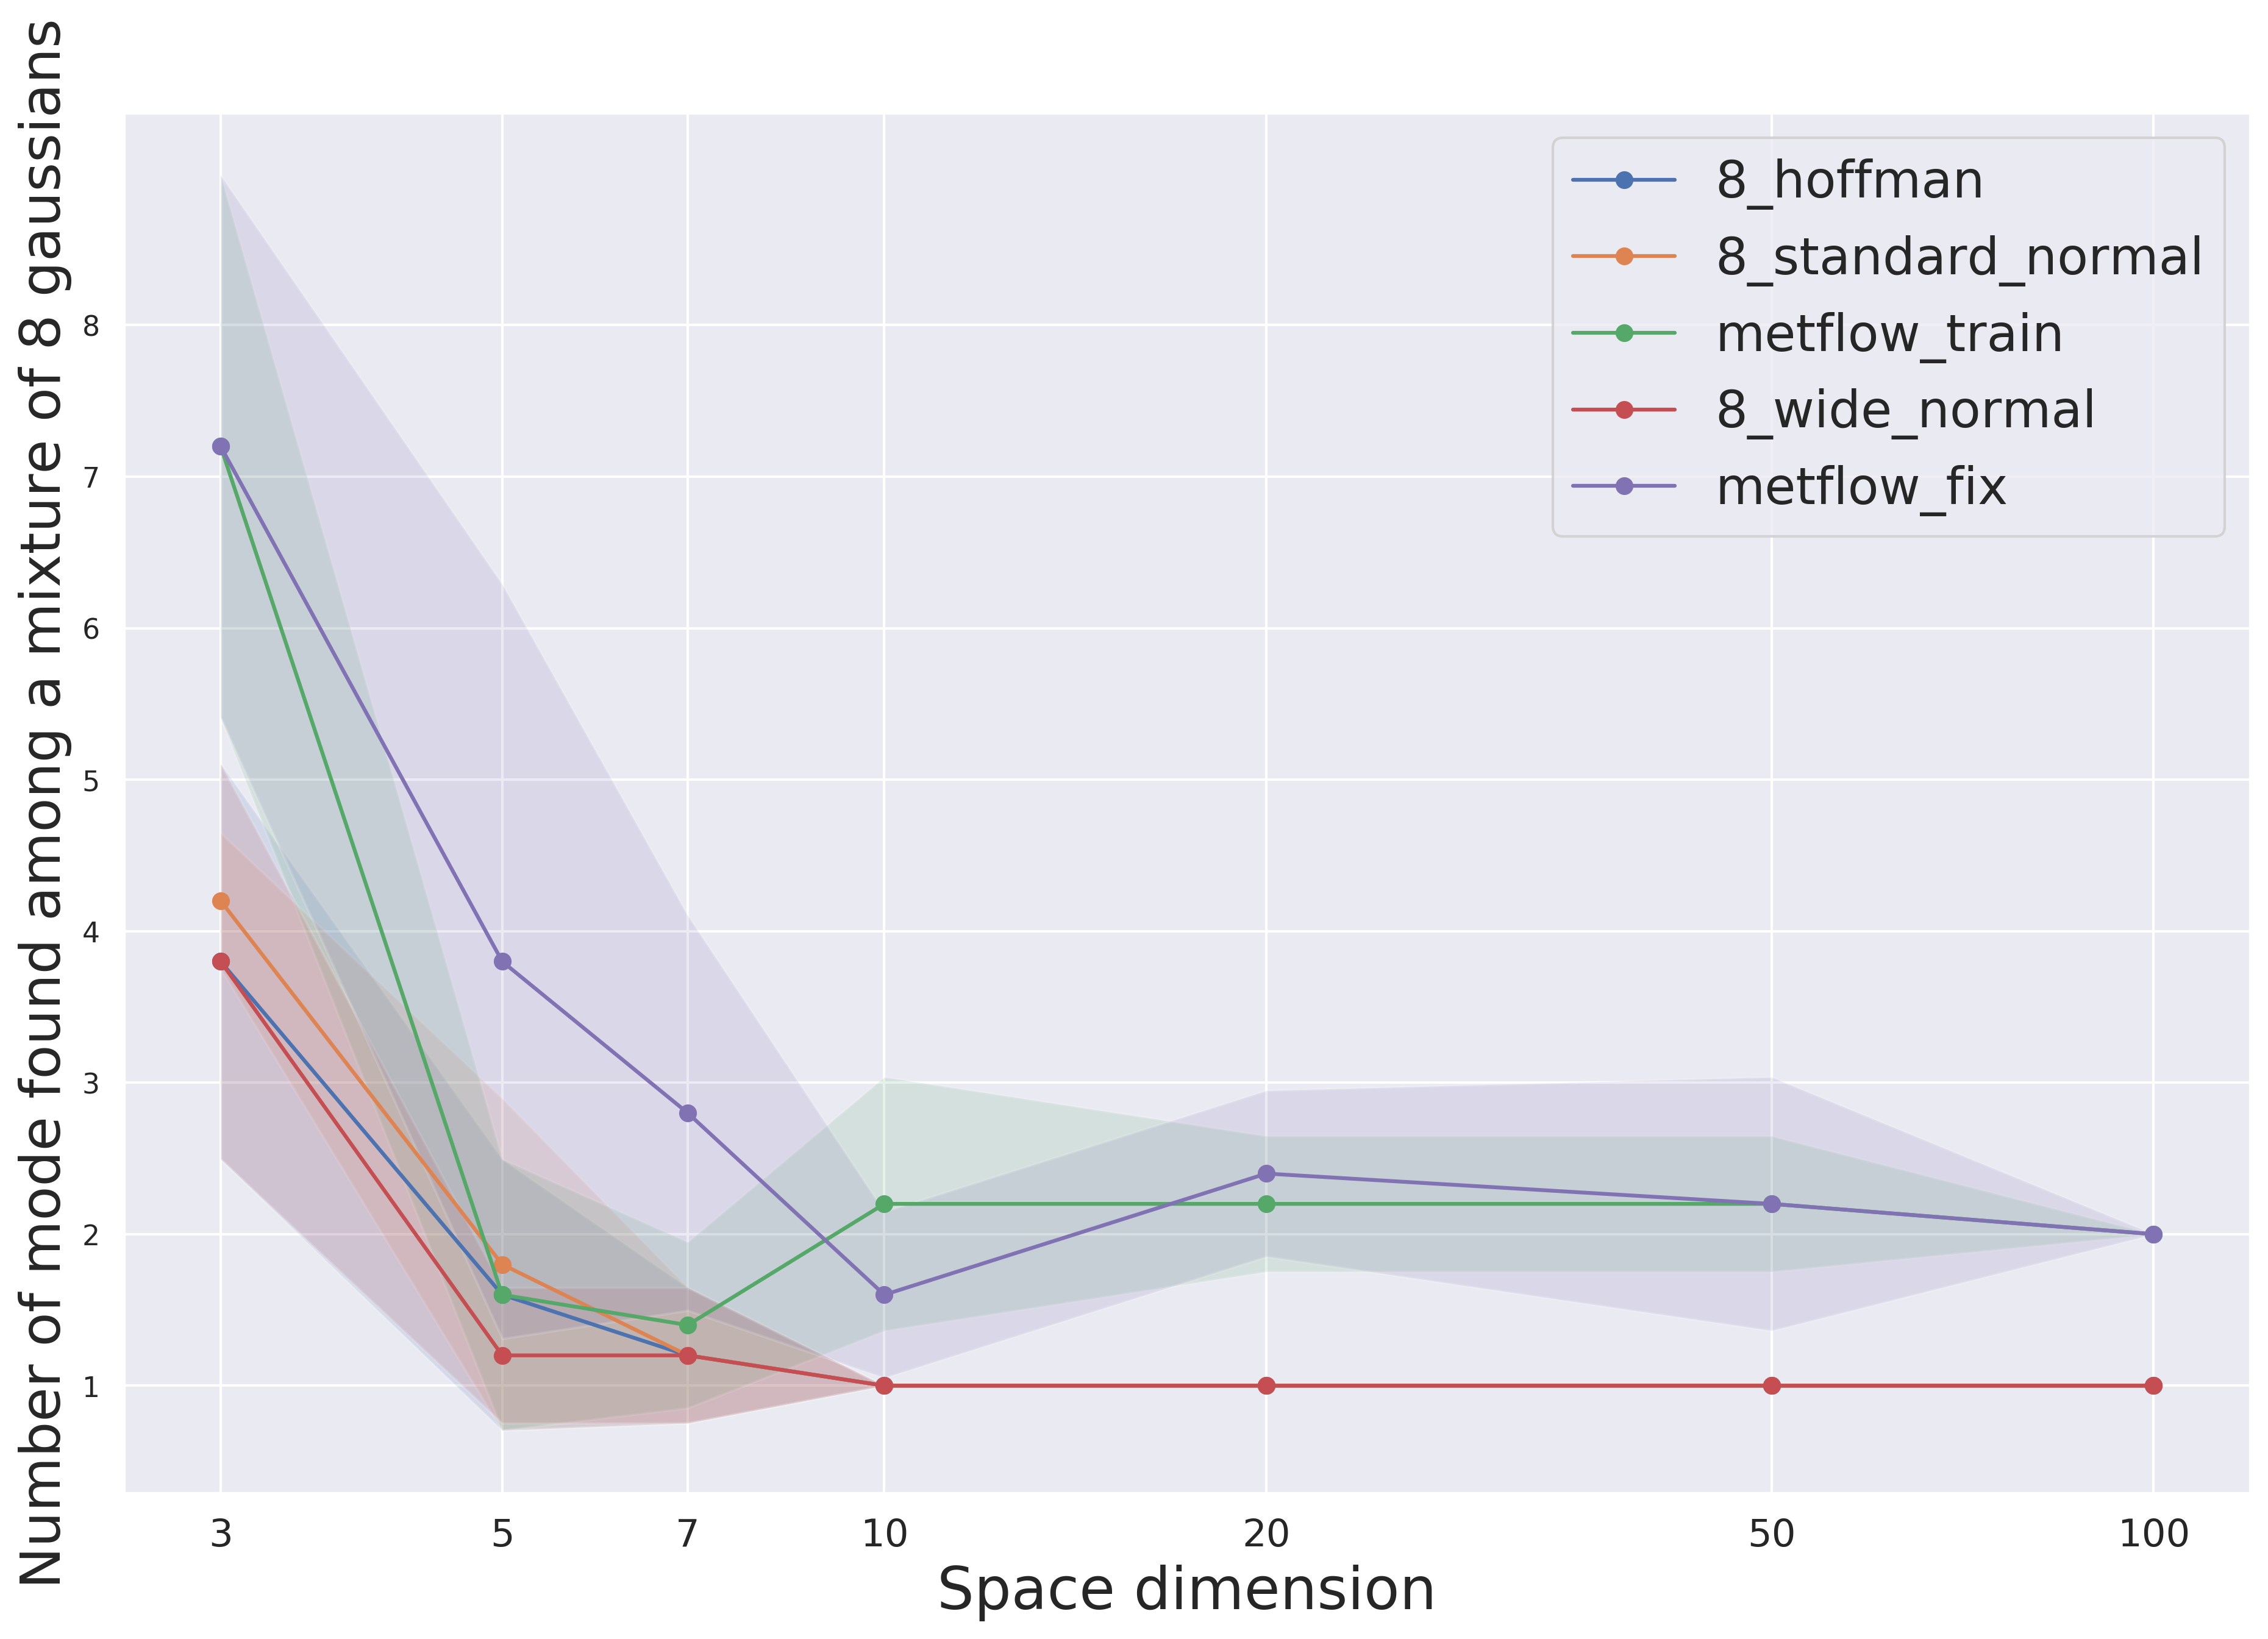

In [16]:
plt.figure(figsize=(15, 10), dpi=300)
dims = [3, 5, 7, 10, 20, 50, 100]
x = np.log(dims)
for alg in list(set(table_to_plot.Algorithm)):
    plt.plot(x, table_to_plot[table_to_plot.Algorithm == alg].Mean_modes,
             label=alg, marker='o')
    plt.fill_between(x,
                     table_to_plot[table_to_plot.Algorithm == alg].Mean_modes - table_to_plot[table_to_plot.Algorithm == alg].Std_modes,
                     table_to_plot[table_to_plot.Algorithm == alg].Mean_modes + table_to_plot[table_to_plot.Algorithm == alg].Std_modes,
                     alpha=.15)
plt.xticks(x, dims, fontsize=15)
plt.yticks(1 + np.arange(8))
plt.xlabel("Space dimension", fontsize=23)
plt.ylabel("Number of mode found among a mixture of 8 gaussians", fontsize=22)
plt.legend(prop={'size': 20});